<a href="https://colab.research.google.com/github/shreyasbkgit/ailab/blob/main/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal Policy:
[['R' 'D' 'D' 'D' 'D']
 ['R' 'R' 'R' 'R' 'D']
 ['R' 'D' 'P' 'R' 'D']
 ['R' 'D' 'D' 'D' 'D']
 ['R' 'R' 'R' 'R' 'G']]


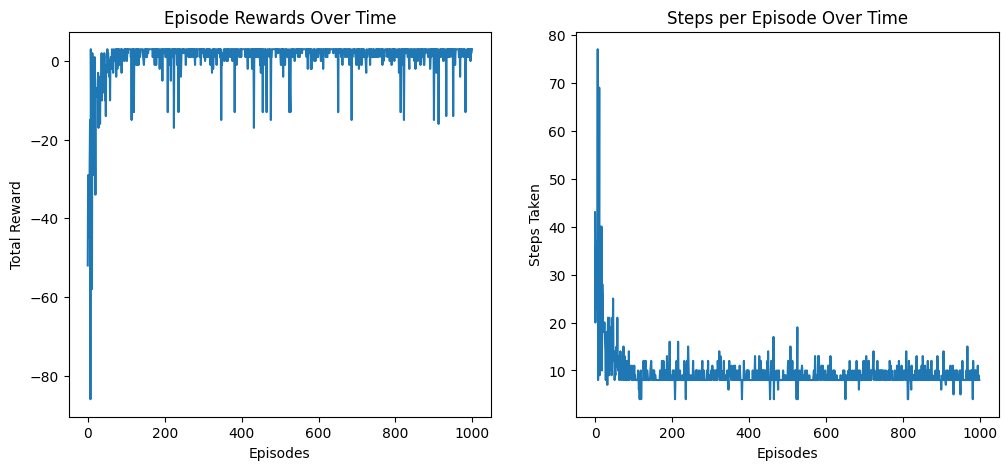

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the grid environment
GRID_SIZE = 5
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_MAP = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}

# Reward structure
GOAL_STATE = (4, 4)
PENALTY_STATE = (2, 2)
GAMMA = 0.9  # Discount factor
ALPHA = 0.1  # Learning rate
EPSILON = 0.1  # Exploration rate
EPISODES = 1000

# Initialize Q-table
Q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

episode_rewards = []
episode_steps = []

# Function to take an action
def take_action(state, action):
    new_state = (max(0, min(GRID_SIZE - 1, state[0] + ACTION_MAP[action][0])),
                 max(0, min(GRID_SIZE - 1, state[1] + ACTION_MAP[action][1])))

    # Reward logic
    if new_state == GOAL_STATE:
        return new_state, 10  # Reward for reaching goal
    elif new_state == PENALTY_STATE:
        return new_state, -10  # Penalty state
    else:
        return new_state, -1  # Small penalty for each move

# Training loop
for episode in range(EPISODES):
    state = (0, 0)  # Start at top-left corner
    done = False
    total_reward = 0
    steps = 0

    while not done:
        # Choose action (ε-greedy policy)
        if random.uniform(0, 1) < EPSILON:
            action = random.randint(0, len(ACTIONS) - 1)  # Explore
        else:
            action = np.argmax(Q_table[state[0], state[1], :])  # Exploit

        new_state, reward = take_action(state, action)

        # Q-learning update rule
        Q_table[state[0], state[1], action] += ALPHA * (
            reward + GAMMA * np.max(Q_table[new_state[0], new_state[1], :]) - Q_table[state[0], state[1], action]
        )

        state = new_state
        total_reward += reward
        steps += 1
        if state == GOAL_STATE or state == PENALTY_STATE:
            done = True

    episode_rewards.append(total_reward)
    episode_steps.append(steps)

# Visualizing the optimal policy
policy = np.full((GRID_SIZE, GRID_SIZE), 'X')
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if (i, j) == GOAL_STATE:
            policy[i, j] = 'G'
        elif (i, j) == PENALTY_STATE:
            policy[i, j] = 'P'
        else:
            best_action = np.argmax(Q_table[i, j, :])
            policy[i, j] = ACTIONS[best_action][0].upper()

print("Optimal Policy:")
print(policy)

# Plot metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(episode_rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Episode Rewards Over Time")

plt.subplot(1, 2, 2)
plt.plot(episode_steps)
plt.xlabel("Episodes")
plt.ylabel("Steps Taken")
plt.title("Steps per Episode Over Time")

plt.show()